In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city_data = []

In [3]:
#  Using NumPy to create random figures
np.random.uniform(-90, 90, size=1500)

array([-16.23217209, -29.51428661, -52.53777874, ...,  82.4953421 ,
        63.9191875 , -44.49449381])

In [4]:
# Adding Timeit
%timeit np.random.uniform(-90, 90, size=1500)

11.5 µs ± 85.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
# defining random latitudes
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = np.random.randint(-90, 90) + np.random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)


3.43 ms ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Import Citipy
from citipy import citipy
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
cities

['marsh harbour',
 'rikitea',
 'yellowknife',
 'hobart',
 'barbar',
 'soe',
 'bluff',
 'castro',
 'chuy',
 'nikolskoye',
 'atuona',
 'bilma',
 'new norfolk',
 'taolanaro',
 'ust-kulom',
 'lorengau',
 'berlevag',
 'ushuaia',
 'jamestown',
 'puerto ayora',
 'maxixe',
 'atar',
 'illoqqortoormiut',
 'port elizabeth',
 'hirara',
 'chokurdakh',
 'khatanga',
 'vaini',
 'butaritari',
 'bengkulu',
 'hilo',
 'tiksi',
 'palabuhanratu',
 'vaitupu',
 'morant bay',
 'belushya guba',
 'krasnoselkup',
 'cherskiy',
 'lavrentiya',
 'henties bay',
 'mataura',
 'saint-philippe',
 'barguzin',
 'hermanus',
 'bandarbeyla',
 'hasaki',
 'kabinda',
 'ponta do sol',
 'klaksvik',
 'kawalu',
 'seoul',
 'busselton',
 'suntar',
 'nanakuli',
 'albany',
 'punta arenas',
 'marcona',
 'kapaa',
 'mpulungu',
 'pevek',
 'saint-joseph',
 'mecca',
 'avarua',
 'baturaja',
 'guerrero negro',
 'kedrovyy',
 'bubaque',
 'ribeira grande',
 'saleaula',
 'narsaq',
 'seminole',
 'mehamn',
 'fortuna',
 'moron',
 'alofi',
 'preobrazhen

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0857bafab7106fceacc87a5d7664babf


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsh harbour
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | barbar
City not found. Skipping...
Processing Record 6 of Set 1 | soe
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | bilma
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | ust-kulom
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | berlevag
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | maxixe
Processing Record 22 of Set 1 | atar
Pr

Processing Record 35 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 4 | puerto penasco
Processing Record 37 of Set 4 | juneau
Processing Record 38 of Set 4 | pisco
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | akdepe
Processing Record 42 of Set 4 | valdivia
Processing Record 43 of Set 4 | general roca
Processing Record 44 of Set 4 | igrim
Processing Record 45 of Set 4 | ucluelet
Processing Record 46 of Set 4 | cedar city
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | crixas
Processing Record 49 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 4 | verkhnyaya inta
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | ust-tsilma
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | hambantota
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | karla
Proce

Processing Record 25 of Set 8 | astana
Processing Record 26 of Set 8 | chumikan
Processing Record 27 of Set 8 | pangody
Processing Record 28 of Set 8 | tawkar
City not found. Skipping...
Processing Record 29 of Set 8 | general pico
Processing Record 30 of Set 8 | nekrasovka
Processing Record 31 of Set 8 | kabwe
Processing Record 32 of Set 8 | muroto
Processing Record 33 of Set 8 | woodhaven
Processing Record 34 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 8 | portobelo
Processing Record 36 of Set 8 | boguchany
Processing Record 37 of Set 8 | houma
Processing Record 38 of Set 8 | chicama
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | vila
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | norman wells
Processing Record 43 of Set 8 | souillac
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | daru
Processing Record 46 of Set 8 | luanda
Processing Record 47 of Set 8 | dubbo
Proces

Processing Record 13 of Set 12 | zonguldak
Processing Record 14 of Set 12 | bossangoa
Processing Record 15 of Set 12 | suluova
Processing Record 16 of Set 12 | buriti bravo
Processing Record 17 of Set 12 | hay river
Processing Record 18 of Set 12 | half moon bay
Processing Record 19 of Set 12 | nizhniy odes
Processing Record 20 of Set 12 | usinsk
Processing Record 21 of Set 12 | orcopampa
Processing Record 22 of Set 12 | bilibino
Processing Record 23 of Set 12 | sahy
Processing Record 24 of Set 12 | lagoa vermelha
Processing Record 25 of Set 12 | terrace
Processing Record 26 of Set 12 | villacarrillo
Processing Record 27 of Set 12 | arvika
Processing Record 28 of Set 12 | mildura
Processing Record 29 of Set 12 | seybaplaya
Processing Record 30 of Set 12 | guicheng
City not found. Skipping...
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | benfleet
Processing Record 33 of Set 12 | nago
Processing Record 34 of Set 12 | dekar
Processing Record 35 of Set 12 | ibra


In [14]:
city_data

[{'City': 'Marsh Harbour',
  'Lat': 26.5412,
  'Lng': -77.0636,
  'Max Temp': 75.11,
  'Humidity': 74,
  'Cloudiness': 0,
  'Wind Speed': 13.38,
  'Country': 'BS',
  'Date': '2022-01-02 13:09:55'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 77.02,
  'Humidity': 71,
  'Cloudiness': 35,
  'Wind Speed': 8.48,
  'Country': 'PF',
  'Date': '2022-01-02 13:09:55'},
 {'City': 'Yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': -13.86,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 8.52,
  'Country': 'CA',
  'Date': '2022-01-02 13:05:21'},
 {'City': 'Hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 56.26,
  'Humidity': 94,
  'Cloudiness': 90,
  'Wind Speed': 1.01,
  'Country': 'AU',
  'Date': '2022-01-02 13:09:56'},
 {'City': 'Soe',
  'Lat': -9.8607,
  'Lng': 124.284,
  'Max Temp': 68.5,
  'Humidity': 95,
  'Cloudiness': 61,
  'Wind Speed': 2.08,
  'Country': 'ID',
  'Date': '2022-01-02 13:09:57'},
 {'City': 'Bluff',
  'Lat': -46.

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marsh Harbour,26.5412,-77.0636,75.11,74,0,13.38,BS,2022-01-02 13:09:55
1,Rikitea,-23.1203,-134.9692,77.02,71,35,8.48,PF,2022-01-02 13:09:55
2,Yellowknife,62.4560,-114.3525,-13.86,91,100,8.52,CA,2022-01-02 13:05:21
3,Hobart,-42.8794,147.3294,56.26,94,90,1.01,AU,2022-01-02 13:09:56
4,Soe,-9.8607,124.2840,68.50,95,61,2.08,ID,2022-01-02 13:09:57
5,Bluff,-46.6000,168.3333,59.81,84,100,3.91,NZ,2022-01-02 13:09:58
6,Castro,-24.7911,-50.0119,77.85,58,0,3.29,BR,2022-01-02 13:09:58
7,Chuy,-33.6971,-53.4616,80.44,61,100,9.91,UY,2022-01-02 13:09:59
8,Nikolskoye,59.7035,30.7861,19.29,97,100,2.82,RU,2022-01-02 13:10:00
9,Atuona,-9.8000,-139.0333,78.28,74,2,19.66,PF,2022-01-02 13:10:00


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marsh Harbour,BS,2022-01-02 13:09:55,26.5412,-77.0636,75.11,74,0,13.38
1,Rikitea,PF,2022-01-02 13:09:55,-23.1203,-134.9692,77.02,71,35,8.48
2,Yellowknife,CA,2022-01-02 13:05:21,62.4560,-114.3525,-13.86,91,100,8.52
3,Hobart,AU,2022-01-02 13:09:56,-42.8794,147.3294,56.26,94,90,1.01
4,Soe,ID,2022-01-02 13:09:57,-9.8607,124.2840,68.50,95,61,2.08
...,...,...,...,...,...,...,...,...,...
558,Taseyevo,RU,2022-01-02 13:28:30,57.2169,94.8978,13.41,90,100,4.52
559,Gushikawa,JP,2022-01-02 13:28:31,26.3544,127.8686,61.83,94,90,3.44
560,Maumere,ID,2022-01-02 13:23:46,-8.6199,122.2111,81.07,82,100,4.12
561,Maiduguri,NG,2022-01-02 13:28:32,11.8464,13.1603,83.14,16,24,14.99


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

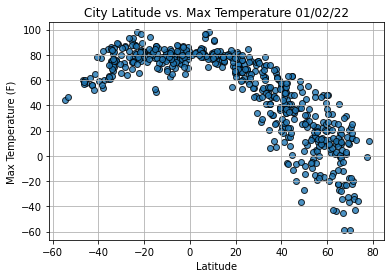

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

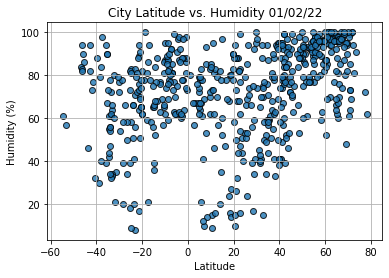

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

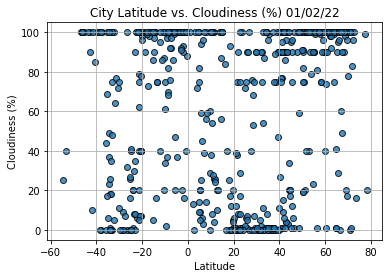

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

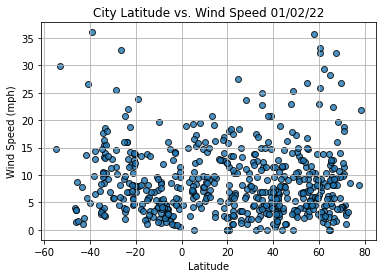

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [41]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, (10,60), fontsize=15, color="red") 
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

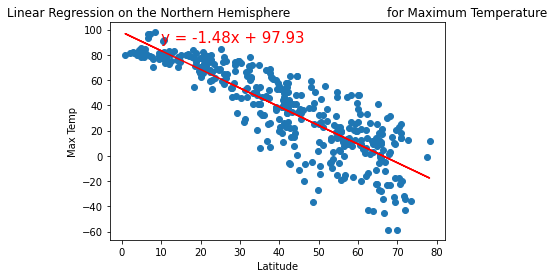

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,90))


In [64]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, (-50,80), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

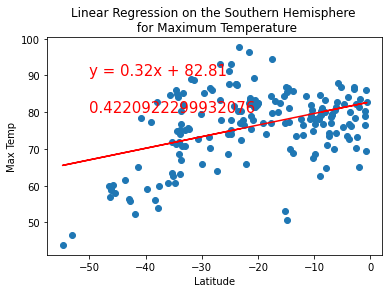

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


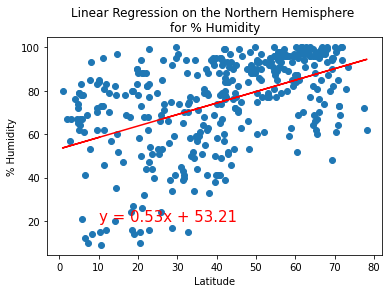

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,20))

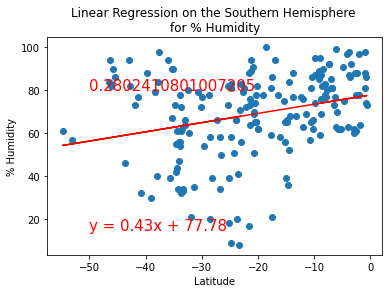

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

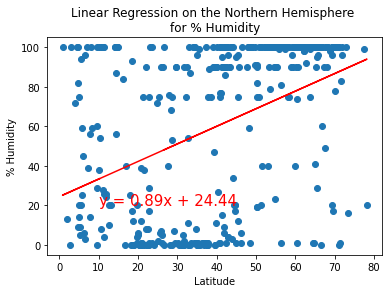

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                             'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,20))

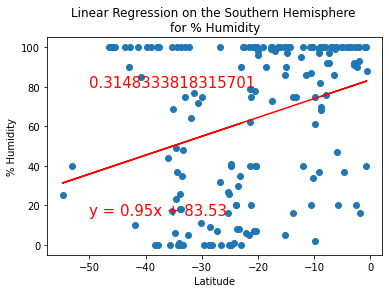

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

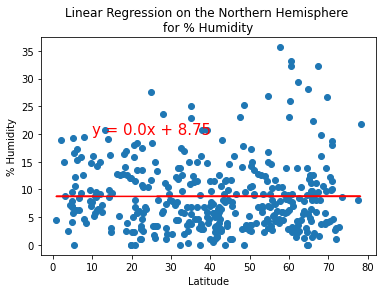

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(10,20))

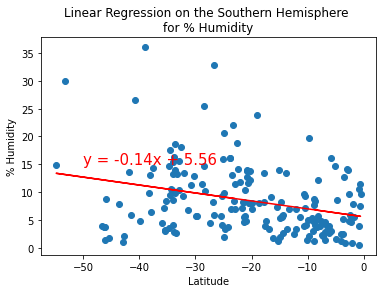

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))